[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW6.ipynb)

**Problem 1** One of the earliest uses of regression was by Francis Galton who studied genetics. He used regression to predict children's heights based on the heights of their parents. There is an interesting story about it here: https://www.newyorker.com/magazine/2005/01/24/measure-for-measure-5. The following chunk loads in Galton's real data set that he used to determine the relationship between children's and parents heights.

In [1]:
# Run next line if in colab. Or run if need to install library
%pip install pydataset

import pandas as pd
from pydataset import data
heights = pd.DataFrame(data("GaltonFamilies"))
heights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=f88231ee07e925ae0ab547705eada53ed4e75846010d2fc6721cd2c3305e2a94
  Stored in directory: /root/.cache/pip/wheels/4c/82/ad/f04abc617222b10438b1285ab9b5cfaecd180c10a7c81cff54
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,001,78.5,67.0,75.43,4,1,male,73.2
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
5,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
930,203,62.0,66.0,66.64,3,1,male,64.0
931,203,62.0,66.0,66.64,3,2,female,62.0
932,203,62.0,66.0,66.64,3,3,female,61.0
933,204,62.5,63.0,65.27,2,1,male,66.5


Part a. Explore the relationship between the target variable, childHeight, and the parents heights. Do not split by gender.

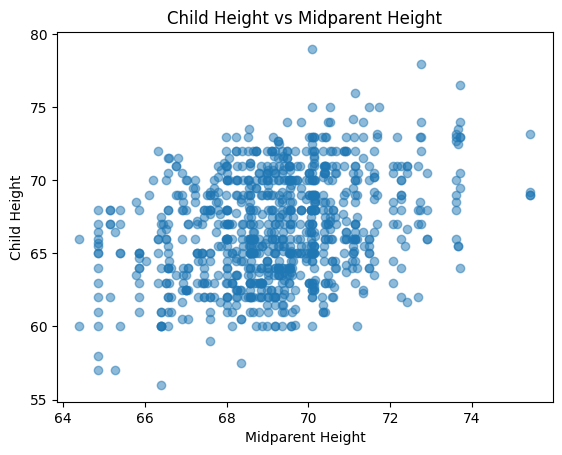

In [3]:
import matplotlib.pyplot as plt

plt.scatter(heights["midparentHeight"], heights["childHeight"], alpha=0.5)
plt.xlabel("Midparent Height")
plt.ylabel("Child Height")
plt.title("Child Height vs Midparent Height")
plt.show()

In [4]:
correlation = heights["midparentHeight"].corr(heights["childHeight"])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.3209498960639596


Part b. Explore the relationship again, this time splitting the data set by gender. In other words, repeat part a, but separately for males and females.

In [5]:
heights_female = heights[heights.gender == "female"]
heights_female

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
7,002,75.5,66.5,73.66,4,3,female,65.5
8,002,75.5,66.5,73.66,4,4,female,65.5
...,...,...,...,...,...,...,...,...
928,202,63.0,63.5,65.79,2,1,female,68.5
929,202,63.0,63.5,65.79,2,2,female,63.5
931,203,62.0,66.0,66.64,3,2,female,62.0
932,203,62.0,66.0,66.64,3,3,female,61.0


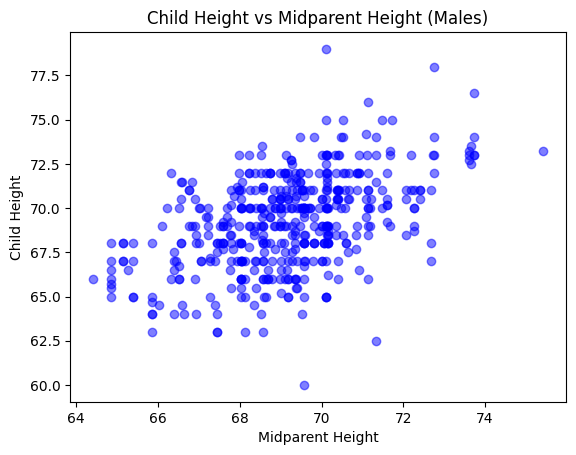

In [6]:
heights_male = heights[heights.gender == "male"]

plt.scatter(heights_male["midparentHeight"], heights_male["childHeight"], alpha=0.5, label="male", color="blue")
plt.xlabel("Midparent Height")
plt.ylabel("Child Height")
plt.title("Child Height vs Midparent Height (Males)")
plt.show()

In [8]:
male_corr = heights_male["midparentHeight"].corr(heights_male["childHeight"])
print("Correlation coefficient for males:", male_corr)

Correlation coefficient for males: 0.48275279903014073


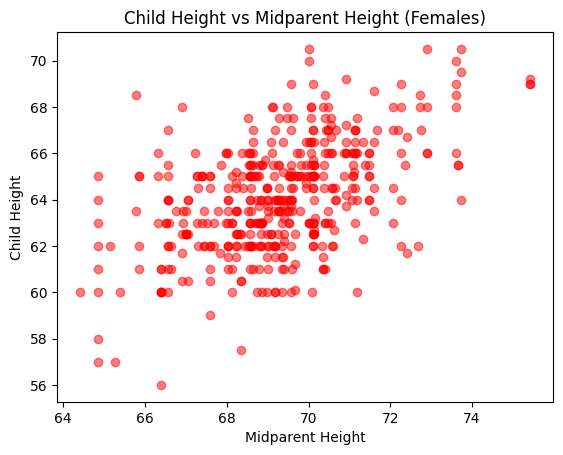

In [7]:
plt.scatter(heights_female["midparentHeight"], heights_female["childHeight"], alpha=0.5, label="female", color="red")
plt.xlabel("Midparent Height")
plt.ylabel("Child Height")
plt.title("Child Height vs Midparent Height (Females)")
plt.show()

In [9]:
female_corr = heights_female["midparentHeight"].corr(heights_female["childHeight"])
print("Correlation coefficient for females:", female_corr)

Correlation coefficient for females: 0.5132725171879091


Part c. Why is separating by gender important for understanding the relationship between child's and parent's heights?

It is important becasue according to the graphs, the males and females both have different relationships with thier height and their parent's hieght. Splitting the data is super helpful in helpind us see relationships as well. The first graph with both shows a huge blob that looks like there is not as much correlation. When we split the data by gender, the correlation scores go up and the correlation is easier to see on the graphs.

**Problem 2**: Continuing with Galton's height data, fit a linear regression model using midparentHeight and gender as variables.

Part a. Write the code to fit the model.

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

heights['gender_numeric'] = np.where(heights['gender'] == 'male', 1, 0)

X = heights[['midparentHeight', 'gender_numeric']]
y = heights['childHeight']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient for midparentHeight:", model.coef_[0])
print("Coefficient for gender (male=1):", model.coef_[1])

Intercept: 16.514102197606263
Coefficient for midparentHeight: 0.6870152119086935
Coefficient for gender (male=1): 5.2151054073866945


Part b. To include gender as a variable in the model, you needed to create a dummy variable. What is the base level for the variable you created.

The base level for the variable is female. When it is a female it's value is 0.

Part c. Interpret both coefficients in the model you created in the context of the problem.

The coefficient for midparentHeight (0.687) means for each additional inch in the midparentHeight, child height is predicted to increase by about 0.69 inches, holding gender constant.

The coefficient for gender means that Male children are predicted to be about 5.22 inches taller than female children, after controlling for midparentHeight.

**Problem 3** Write code to fit a regression tree for the data.

Part a. Write code to fit the model with a max depth of 3.

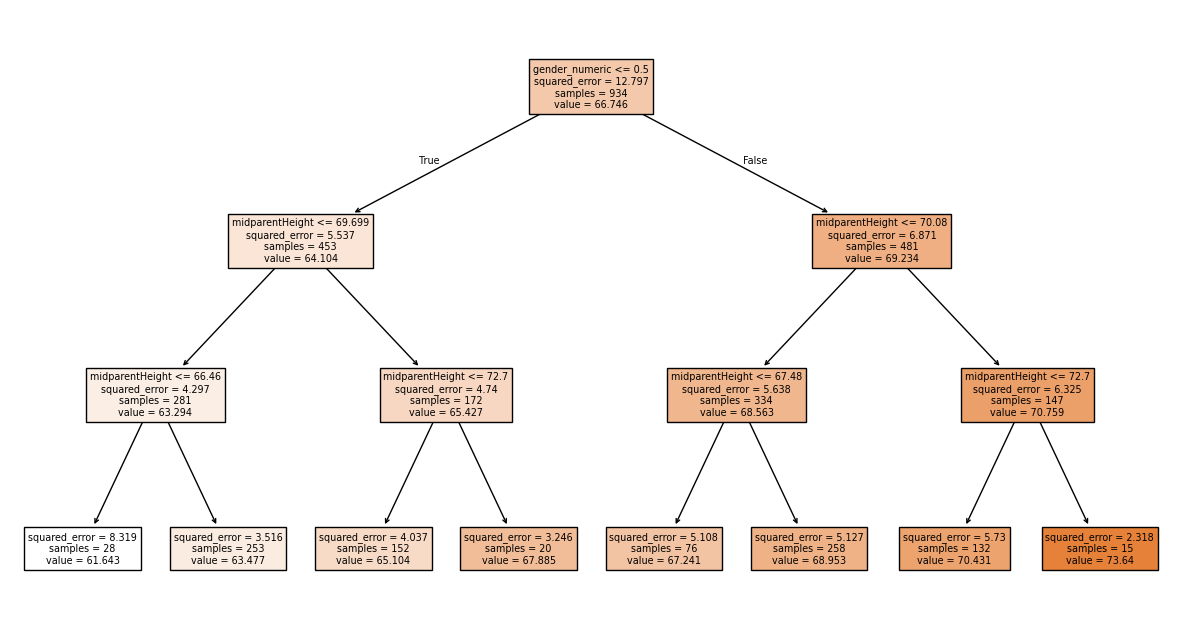

In [12]:
from sklearn.tree import DecisionTreeRegressor

X = heights[['midparentHeight', 'gender_numeric']]
y = heights['childHeight']

tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X, y)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(tree_model, feature_names=['midparentHeight', 'gender_numeric'], filled=True)
plt.show()


Part b. Find any split based on gender. Describe what those splits mean?

There is one split on gender and it is the first split. It means that the tree can recognize that boys and girls have different average heights, and helps the model gain the most information to split those first. The most gain in information is from that split in the tree.

**Problem 4**: Insurance companies will use individual characteristics to predict how much an individual will cost in order to reserve enough money on hand to cover expenses. The data set we will use is from Kaggle. You can find it at: https://www.kaggle.com/datasets/mirichoi0218/insurance

The full data set you get from kaggle you can get into Python using

insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

Use this dataset to answer the remainder of the questions on the homework.

Part a. For each variable in the data set, list if it is continuous or categorical. If categorical specify if it is binary or not and list each value it can have.

In [13]:
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")
print("Column names and data types:")
print(insurance_all.dtypes)

for col in insurance_all.columns:
    print(f"\n{col}:")
    print(insurance_all[col].unique())

Column names and data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

age:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

sex:
['female' 'male']

bmi:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19

Age - Continuous - Not Binary

Sex - Categorical - Binary - "male", "female

Bmi - Continuous - Not Binary

Children - Discrete - No - 0,1,2,3,4,5

Smoker - Categorical - Binary - "yes", "no"

Region - Categorical - Not Binary - "northeast", "northwest", "souteast", "southwest"

Charges - Continous - Not Binary



Part b. Do an exploratory analysis of the data. charges is the target variable and the rest are predictors. Use figures to explore the relationship between the predictor variables in the data and charges.

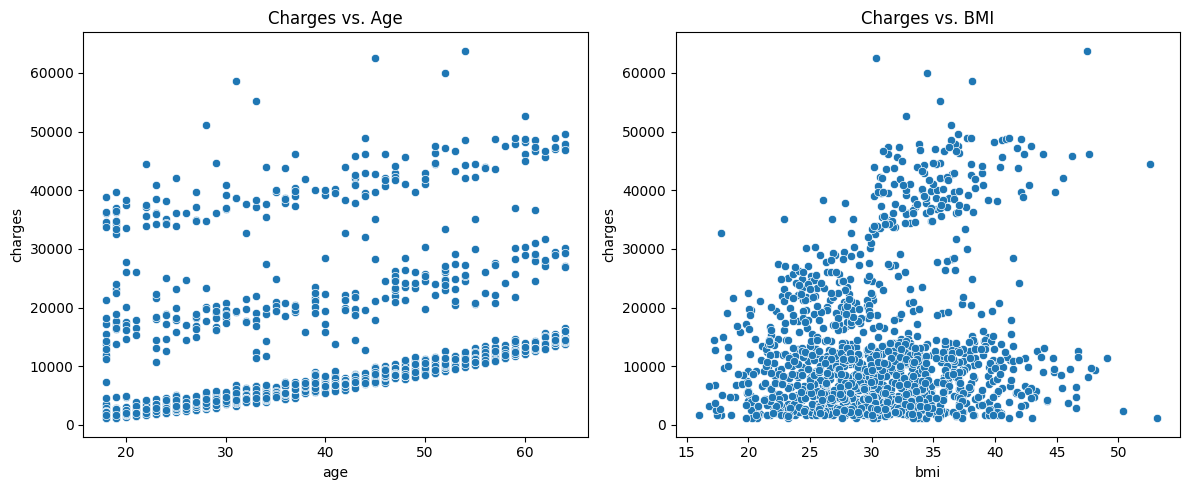

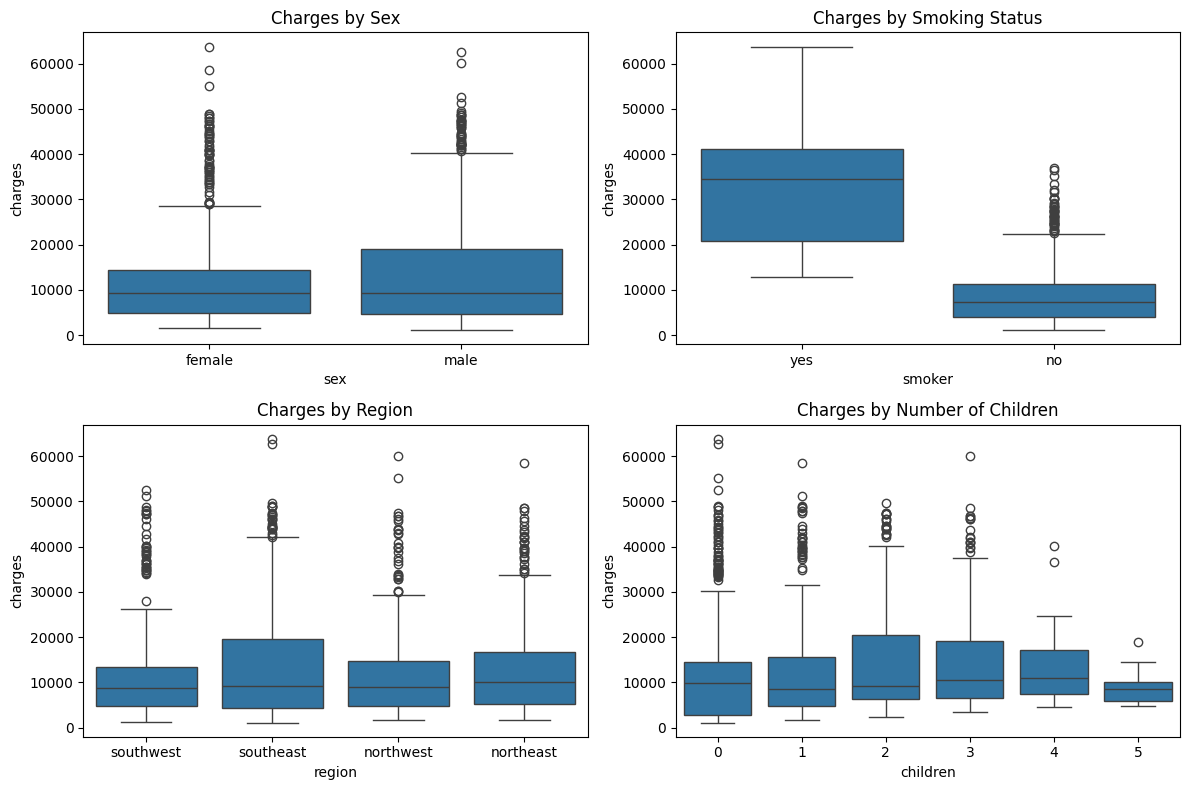

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Continuous variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=insurance_all)
plt.title('Charges vs. Age')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=insurance_all)
plt.title('Charges vs. BMI')
plt.tight_layout()
plt.show()

# 2. Categorical variables (boxplots)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='charges', data=insurance_all)
plt.title('Charges by Sex')

plt.subplot(2, 2, 2)
sns.boxplot(x='smoker', y='charges', data=insurance_all)
plt.title('Charges by Smoking Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='region', y='charges', data=insurance_all)
plt.title('Charges by Region')

plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=insurance_all)
plt.title('Charges by Number of Children')
plt.tight_layout()
plt.show()


Part c. Write the code that fits a linear regression model to the data, predicting charges from the other variables.

In [15]:
insurance_encoded = pd.get_dummies(insurance_all, drop_first=True)

X = insurance_encoded.drop('charges', axis=1)
y = insurance_encoded['charges']

reg_model = LinearRegression()
reg_model.fit(X, y)

coeffs = pd.Series(reg_model.coef_, index=X.columns)
print("Intercept:", reg_model.intercept_)
print("Coefficients:")
print(coeffs)

Intercept: -11938.538576167146
Coefficients:
age                   256.856353
bmi                   339.193454
children              475.500545
sex_male             -131.314359
smoker_yes          23848.534542
region_northwest     -352.963899
region_southeast    -1035.022049
region_southwest     -960.050991
dtype: float64


Part d. For each categorical variable in the original data set, report what variables have been created to represent it in the data we use in the regression model. Report what the base level is for each categorical variable.


Sex
*   Variable created: sex_male
*   Base level: female

Smoker
*   Variable created: smoker_yes
*   Base level: not a smoker

Region
*   Variables created: region_northwest, region_southeast, region_southwest
*   Base level: northeast


Part e. Explain how the effect of age is interpreted in the regression model.

For each additional year of age, the predicted insurance charges increase by about $256.86 holding all other variables constant.

Part f. Explain how the effect of smoking is interpreted in the regression model.

If a person is a smoker, their predicted insurance charges are about $23,848.53 higher than those of a non-smoker, holding all other variables constant.

Part g. Explain how the effect of region is interpreted in the regression model.

People in the northwest are predicted to pay about $150 more on their insurance, holding all other variables constant.

People in the southeast are predicted to pay about $1000 less, holding all other variables constant.

People in the southwest are predicted to pay about $800 less, holding all other variables constant.

**Problem 5** Run the following code, which splits the outcome variable into high charges and low charges.

In [16]:
# targets from insurance['charges'] only
import pandas as pd
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

import numpy as np
import pandas as pd

m = insurance_all['charges'].median()
insurance_all['cost_bin2'] = np.where(insurance_all['charges'] <= m, 'low', 'high')

q33, q67 = insurance_all['charges'].quantile([0.33, 0.67]).values
insurance_all['cost_bin3'] = pd.cut(
    insurance_all['charges'],
    bins=[-np.inf, q33, q67, np.inf],
    labels=['low', 'med', 'high']
)


Part a. Fit a logistic regression model with `cost_bin2` as the target variable.

In [17]:
from sklearn.linear_model import LogisticRegression

X = pd.get_dummies(insurance_all.drop(["charges", "cost_bin2"], axis=1), drop_first=True)
y = np.where(insurance_all['cost_bin2'] == 'high', 1, 0)  # high = 1, low = 0

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X, y)

coeffs = pd.Series(logit_model.coef_[0], index=X.columns)
print("Intercept:", logit_model.intercept_[0])
print("Coefficients:")
print(coeffs)

Intercept: -12.418549784829297
Coefficients:
age                 0.247901
bmi                 0.033182
children            0.265846
sex_male           -0.376020
smoker_yes          2.981795
region_northwest   -0.305161
region_southeast   -0.821096
region_southwest   -0.609941
cost_bin3_med      -0.294463
cost_bin3_high      7.528912
dtype: float64


Part b. Interpret the coefficient associated with `age`

For each additional year of age, the log-odds of having high insurance charges (vs. low) increase by 0.25, holding all other variables constant.

Part c. Fit a classification tree for `cost_bin2` with a max depth of 3.

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

Part d. Print the tree.

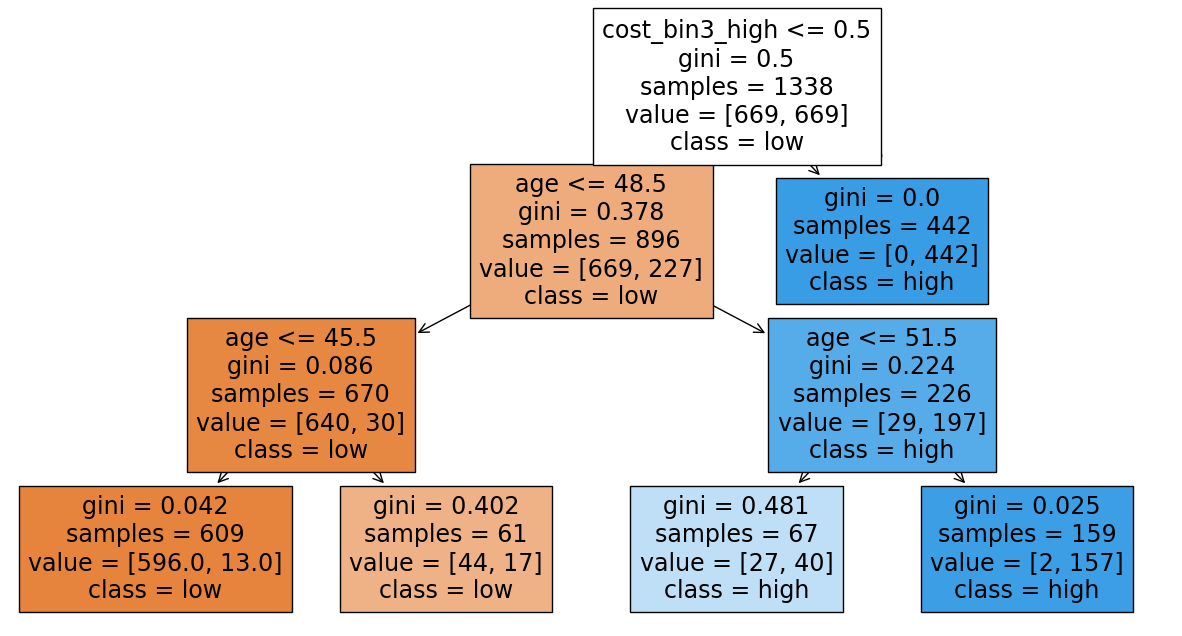

In [21]:
plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=X.columns, class_names=['low', 'high'], filled=True)
plt.show()

Part e. Fit a a classification tree for the target variable with 3 bins, called `cost_bin3` with a max depth of 3 and print the resulting tree.

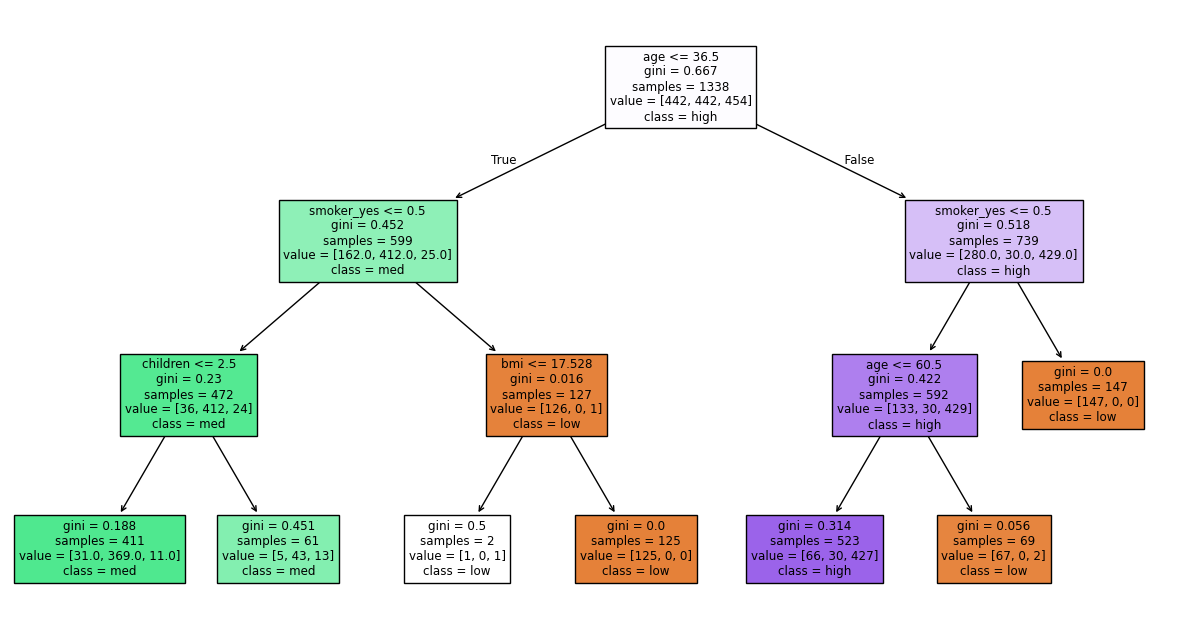

In [22]:
X3 = pd.get_dummies(insurance_all.drop(["charges", "cost_bin2", "cost_bin3"], axis=1), drop_first=True)
y3 = insurance_all['cost_bin3']

tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X3, y3)

plt.figure(figsize=(15, 8))
plot_tree(tree3, feature_names=X3.columns, class_names=['low', 'med', 'high'], filled=True)
plt.show()